<a href="https://colab.research.google.com/github/c4bath/cf860/blob/main/AptosEDAv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APTOS 2019 Blindness Detection Dataset: Exploratory Data Analysis

APTOS: Asia Pacific Tele-Ophthalmology Society)


https://www.kaggle.com/competitions/aptos2019-blindness-detection/data

A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR


train_images: 3,662 files (source of all images used)

test_images: 1,928 files (not used here as they are not labeled)

Class labels are in train.csv

In [1]:
# Access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/drive/MyDrive/cfPublicData/aptos/train.csv'

# Read the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB
None


In [6]:
df.describe()

,diagnosis
count,3662.000000
mean,1.126980
std,1.298409
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [7]:
df.isnull().sum()

id_code      0
diagnosis    0
dtype: int64

In [8]:
df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

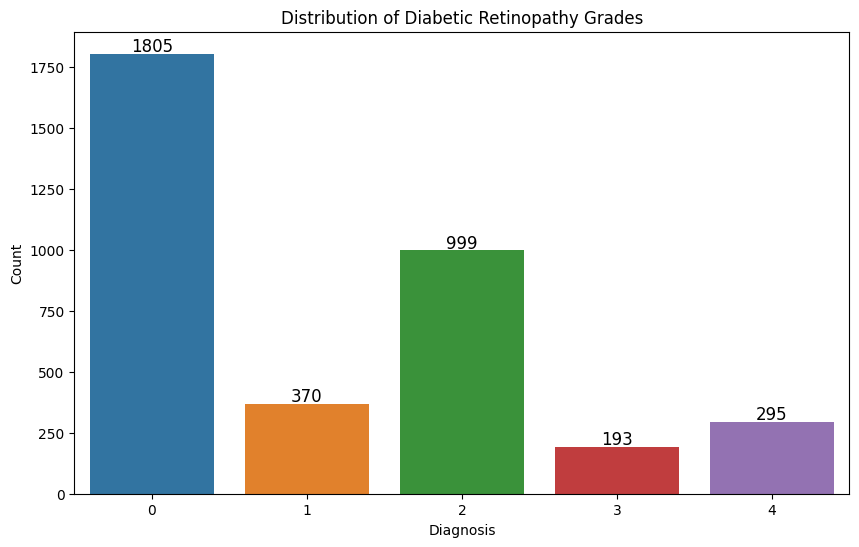

In [19]:
plt.figure(figsize=(10, 6))  # Set a figure size if needed
ax = sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diabetic Retinopathy Grades')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

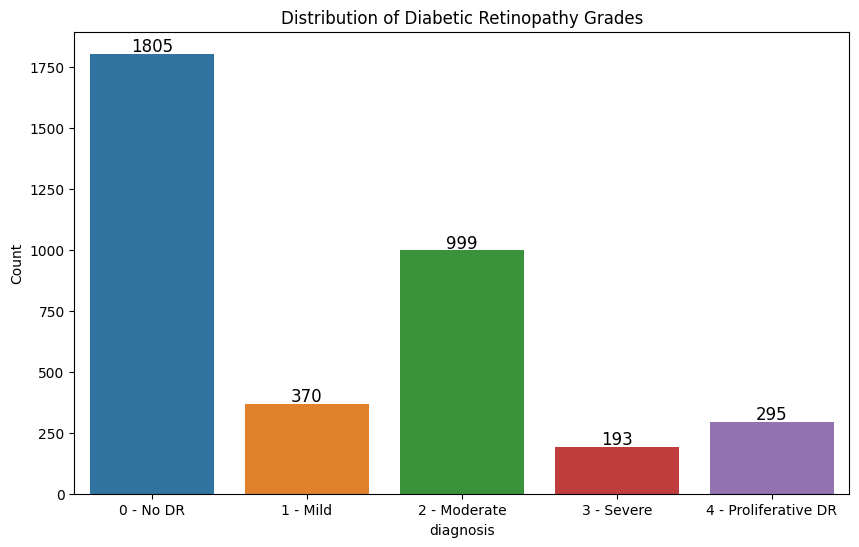

In [22]:
# Visualization of the class distribution
plt.figure(figsize=(10, 6))  # Set a figure size if needed
ax = sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diabetic Retinopathy Grades')

# Define custom labels for the x-axis
diagnosis_labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
ax.set_xticklabels(diagnosis_labels)

plt.ylabel('Count')

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


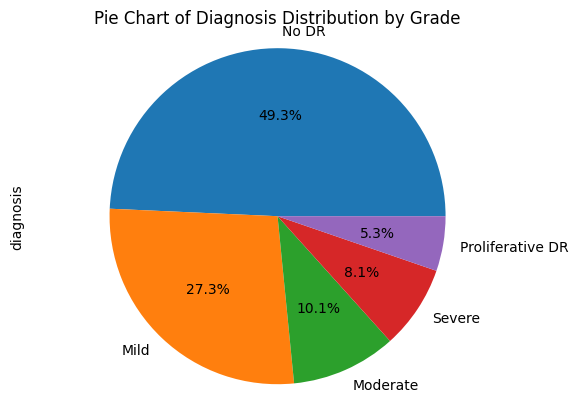

In [17]:
diagnosis_labels = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
df['diagnosis'].value_counts().plot(kind='pie', labels=diagnosis_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of Diagnosis Distribution by Grade')
plt.show()

In [14]:
print("Classes Balance:")
print(df['diagnosis'].value_counts(normalize=True))

Classes Balance:
0    0.492900
2    0.272802
1    0.101038
4    0.080557
3    0.052703
Name: diagnosis, dtype: float64
